In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.optimizers import Adam

In [ ]:
#load dataset

mnist = tf.keras.datasets.mnist

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

In [ ]:
# normalising between 0 & 1

x_train_mnist, x_test_mnist = x_train_mnist / 255, x_test_mnist / 255

In [ ]:
# function to create and compile CNN model
def create_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= (28,28,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Function to train and evaluate the model
def train_and_evaluate(model, x_train, y_train, x_val, y_val, epochs=10):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val))
    return history

In [ ]:
def plot_metrics(history, title):
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.show()

In [ ]:
# reshape the data for CNN

x_train_mnist = x_train_mnist.reshape((60000, 28, 28, 1))
x_test_mnist = x_test_mnist.reshape((10000, 28, 28, 1))

In [ ]:
# Create and compile the CNN model
model_mnist = create_cnn()

# Train and evaluate the model
history_mnist = train_and_evaluate(model_mnist, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, epochs=42)

Epoch 1/42
1875/1875 [==============================] - 22s 5ms/step - loss: 0.1484 - accuracy: 0.9537 - val_loss: 0.0447 - val_accuracy: 0.9861
Epoch 2/42
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0258 - val_accuracy: 0.9923
Epoch 3/42
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0335 - accuracy: 0.9899 - val_loss: 0.0327 - val_accuracy: 0.9901
Epoch 4/42
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 5/42
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0271 - val_accuracy: 0.9926
Epoch 6/42
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0517 - val_accuracy: 0.9863
Epoch 7/42
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0314 - val_accuracy

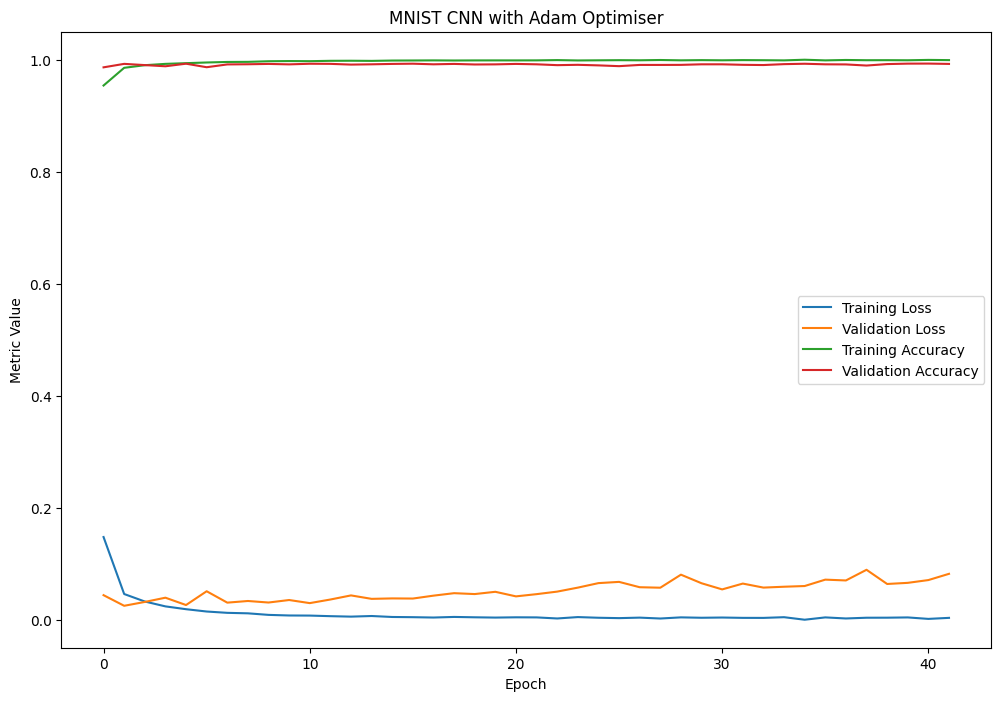

In [ ]:
plot_metrics(history_mnist, 'MNIST CNN with Adam Optimiser')

Adam, a widely used optimizer, integrates concepts from both RMSprop and momentum. It dynamically adjusts learning rates for individual parameters. By the 42nd epoch, Adam demonstrated exceptional performance with very high accuracy and remarkably low loss. It's noteworthy that driving the loss to zero is not ideal for training purposes because of overfitting risk and memorization